In [10]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
import sklearn.metrics as metrics
import itertools
import pickle

## Get data from Datacamp's S3 bucket

In [11]:
df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv")
print(df.shape)
print("Number of fakes: ",df[df['label'].str.contains("FAKE")].shape[0])
df.head()

(6335, 4)
('Number of fakes: ', 3164)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


For now, only text is used as a feature until title is explored differently

In [12]:
# Do a 80-20 split of data into train and test sets. 
df = df[['title','text','label']]
trainX, testX, trainY, testY = train_test_split(df['text'], df['label'], test_size = 0.20, random_state=44)

In [13]:
# Initialize vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
train_tfidf = tfidf_vectorizer.fit_transform(trainX)
test_tfidf = tfidf_vectorizer.transform(testX)

In [14]:
#only need to do this once
f = open("tfidf_vectorizer.pckl",'wb')
pickle.dump(tfidf_vectorizer,f)
f.close()

In [15]:
#tfidf_vectorizer.get_feature_names()[-10:]
tfidf_df = pd.DataFrame(train_tfidf.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head()

,00,000,0000,000000031,000035,0001,0002,000billion,000ft,000km,...,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Passive Aggressive model 
Linear and takes less time

In [17]:
linear_clf = PassiveAggressiveClassifier(max_iter=50, verbose=1, n_jobs=-1)

In [18]:
linear_clf.fit(train_tfidf, trainY)
pred = linear_clf.predict(test_tfidf)
score = metrics.accuracy_score(testY, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(testY, pred, labels=['FAKE', 'REAL'])

-- Epoch 1
Norm: 38.94, NNZs: 47915, Bias: -0.612969, T: 5042, Avg. loss: 0.320269
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 44.50, NNZs: 48800, Bias: -0.537664, T: 10084, Avg. loss: 0.074000
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 47.24, NNZs: 49079, Bias: -0.509472, T: 15126, Avg. loss: 0.032420
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 48.48, NNZs: 49115, Bias: -0.514986, T: 20168, Avg. loss: 0.015522
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 48.99, NNZs: 49121, Bias: -0.512457, T: 25210, Avg. loss: 0.007713
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 49.25, NNZs: 49124, Bias: -0.515301, T: 30252, Avg. loss: 0.005117
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 49.37, NNZs: 49124, Bias: -0.510190, T: 35294, Avg. loss: 0.003665
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 49.43, NNZs: 49124, Bias: -0.512512, T: 40336, Avg. loss: 0.003074
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 49.46, NNZs: 49124, Bias: -0.511

Confusion matrix, without normalization


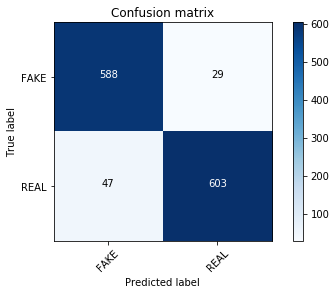

In [19]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [20]:
f = open('PAC_model.pckl', 'wb')
pickle.dump(linear_clf, f)
f.close()

## Most Common Words Associated With Fake News

In [21]:
class_labels = linear_clf.classes_
feature_names = tfidf_vectorizer.get_feature_names()
topn_class1 = sorted(zip(linear_clf.coef_[0], feature_names))[:50]

for coef, feat in topn_class1:
    print(feat)

2016
october
share
november
article
election
source
hillary
print
advertisement
establishment
mosul
snip
fbi
oct
podesta
corporate
wikileaks
email
28
stated
uk
healthcare
26
ayotte
published
filed
reuters
war
order
obamacare
photo
shares
dakota
pipeline
free
com
bonuses
daesh
just
plant
african
sources
issa
jewish
donald
posted
soros
runway
entire


### Multinomial NB model 

In [32]:
clf = MultinomialNB()

In [ ]:
train_tfidf[:100].shape

In [33]:
clf.fit(train_tfidf[:100], trainY[:100])
pred = clf.predict(test_tfidf)
print("Accuracy: ", sklearn.metrics.accuracy_score(testY, pred))

cm = sklearn.metrics.confusion_matrix(testY, pred, labels=['FAKE','REAL'])
plot_confusion_matrix(cm, classes=['FAKE','REAL'])

Accuracy:  0.0


/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/metrics/classification.py:248: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

## GBQ stuff that we might not need anymore

In [9]:
sampleDF.to_gbq('FakeNews.SampleTable','vu-nlp',verbose=True)




Load is 100% Complete




In [2]:
def load_sample():
  q = bqd.Query(sql='''
    SELECT
      title
    FROM
      `vu-nlp.FakeNews.FAKENEWS` 
  WHERE
    country = 'US'
    and language ='english'
  LIMIT 10
  ''')
  
  print("Executing BigQuery query...")
  return(q.execute().result().to_dataframe())

sampleDF = load_sample()
sampleDF

NameError: global name 'bqd' is not defined